# Regression in PyTorch

In [1]:
import torch
import torch.nn as nn

In [2]:
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [3]:
w

tensor(3., requires_grad=True)

In [4]:
def ffwd(x):
    return w*x + b

In [5]:
x = torch.tensor([4])

In [6]:
ffwd(x)

tensor([13.], grad_fn=<AddBackward0>)

In [7]:
x = torch.tensor([[5], [2]])

In [8]:
ffwd(x)

tensor([[16.],
        [ 7.]], grad_fn=<AddBackward0>)

Linear Model

In [13]:
torch.manual_seed(3)
model = nn.Linear(in_features = 1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.7889], requires_grad=True) Parameter containing:
tensor([[-0.9915]], requires_grad=True)


In [14]:
x = torch.tensor([3.0])
print(model(x))

tensor([-3.7633], grad_fn=<AddBackward0>)


class of regressor

In [15]:
class LinearRegression(nn.Module):
    
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        

In [16]:
torch.manual_seed(1)
lr = LinearRegression(1, 1)

In [17]:
list(lr.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [18]:
class LinearRegression(nn.Module):
    
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def ffwd(self, x):
        return self.linear(x)

In [19]:
torch.manual_seed(1)
lr = LinearRegression(1, 1)

In [20]:
x = torch.tensor([4.3])

In [21]:
lr.ffwd(x)

tensor([1.7743], grad_fn=<AddBackward0>)

##### Simple Dataset

In [22]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [23]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3

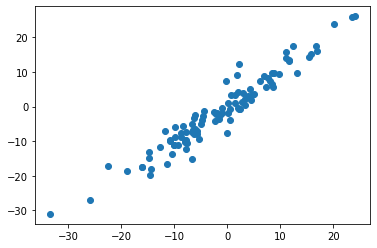

In [24]:
plt.scatter(X, y)

In [25]:
list(lr.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [26]:
[w, b] = lr.parameters()

In [27]:
def get_parameters():
    return w[0][0].item(), b[0].item()

In [28]:
def plot_model_fit():
    w1, b1 = get_parameters()
    x1 = np.array([-30,30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, '-r')
    plt.scatter(X, y)

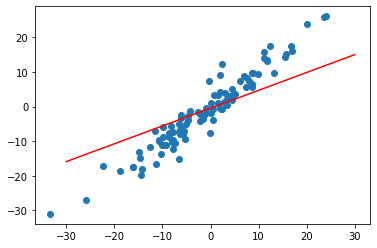

In [29]:
plot_model_fit()

### Improving the Fit

$$(y - (wx + b))^2$$

Take for example the point $(-3, 3)$.

$$\text{Loss} = (3 - (w(-3) + b))^2$$

Choose $w$ to minimize error.

$$w_1 = w_0 - \alpha f'(w)$$

In [30]:
w0 = -1.5
b = 1
alpha = 0.01

In [31]:
loss = (3 - (-1.5*-3 + 1))**2

In [32]:
loss

6.25

In [33]:
d_loss = 2*(3 + 3*w0)*3

In [34]:
d_loss

-9.0

In [35]:
w1 = w0 - alpha*d_loss

In [36]:
w1

-1.41

Typically we also have bias term and update according to gradients.

$$m_1 = m_0 - \alpha f'(m)$$
$$b_1 = b_0 - \alpha f'(b)$$

### Implementing in PyTorch

In [37]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def ffwd(self, x):
        return self.linear(x)

In [38]:
torch.manual_seed(1)
X = torch.randn(100, 1)*10

y = X + 3*torch.randn(100, 1)

In [39]:
model = LinearRegression(1, 1)

In [40]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [41]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.ffwd(X)
    loss = criterion(y_pred, y)
    if i%9 == 0:
        print(f'epoch {i}, loss: {loss.item()}')
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0, loss: 10.461552619934082
epoch 9, loss: 10.308244705200195
epoch 18, loss: 10.20394515991211
epoch 27, loss: 10.13296127319336
epoch 36, loss: 10.084636688232422
epoch 45, loss: 10.051724433898926
epoch 54, loss: 10.029300689697266
epoch 63, loss: 10.014020919799805
epoch 72, loss: 10.003602027893066
epoch 81, loss: 9.996493339538574
epoch 90, loss: 9.991643905639648
epoch 99, loss: 9.988332748413086


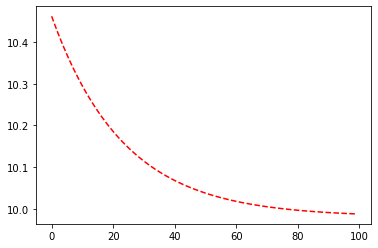

In [42]:
plt.plot(range(epochs), losses, '--r')

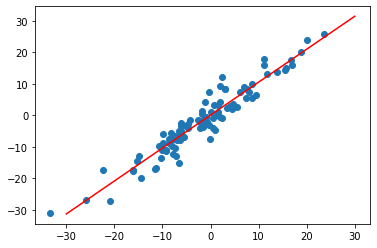

In [43]:
w, b = model.parameters()
plot_model_fit()

In [44]:
w

Parameter containing:
tensor([[1.0454]], requires_grad=True)

In [45]:
b

Parameter containing:
tensor([0.0632], requires_grad=True)